In [1]:
#Import packages
import pickle
import pandas as pd
import numpy as np
import math
from math import isnan
import seaborn as sns
import statistics
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
#Open dataframe saved from scraping process
with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)

In [159]:
#calculate fraction of the 3 important types of assessment
vigtige = 0
andre = 0
for i in range(0,len(df)):
    if df["Type of assessmet_edit"][i]=="Oral" or df["Type of assessmet_edit"][i]=="Written under invigilation" or df["Type of assessmet_edit"][i]=="Written not under invigilation":
        vigtige = vigtige +1
    if df["Type of assessmet_edit"][i]=="Continuous assessment not exam" or df["Type of assessmet_edit"][i]=="Portfolio" or df["Type of assessmet_edit"][i]=="Practical" or df["Type of assessmet_edit"][i]=="Course participation written" or df["Type of assessmet_edit"][i]=="Course participation not written" or df["Type of assessmet_edit"][i]=="Continuous assessment exam" or df["Type of assessmet_edit"][i]=="Other":
        andre = andre +1
print("De tre vigtige: ",vigtige)
print("De øvrige: ", andre)
print("Fraktion: ", 100*(vigtige/(andre+vigtige)))

De tre vigtige:  10691
De øvrige:  3293
Fraktion:  76.4516590389016


In [3]:
#Calculate gpa when only passed exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [7]:
#Calculates gpa's on type of assessment
cane = gpa(df,"Continuous assessment not exam")
oral = gpa(df,"Oral")
wnui = gpa(df,"Written not under invigilation")
wui = gpa(df,"Written under invigilation")
port = gpa(df,"Portfolio")
prac = gpa(df,"Practical")
cpw = gpa(df,"Course participation written")
cpnw = gpa(df,"Course participation not written")
cae = gpa(df,"Continuous assessment exam")
other = gpa(df,"Other")

In [8]:
#Self-explaining
print("Written not under invigilation ",wnui)
print("Written under invigilation: ",wui)
print("Oral: ",oral)

print("Continuous assessment exam: ",cae)
print("Course participation written: ",cpw)
print("Course participation not written: ",cpnw)

print("Portfolio: ",port)
print("Practical: ",prac)
print("Other: ",other)

print("Continuous assessment no exam: ",cane)

Written not under invigilation  7.970297719470407
Written under invigilation:  6.591285108980847
Oral:  8.727513470023109
Continuous assessment exam:  7.848840234005831
Course participation written:  7.788071597048979
Course participation not written:  8.53326916303788
Portfolio:  8.350214896224989
Practical:  7.430678518734344
Other:  8.058445698720027
Continuous assessment no exam:  8.09986587529809


In [164]:
#Calculate frequencies of the three types.
a = gpa_frequencies(df,"Written not under invigilation")
b = gpa_frequencies(df,"Written under invigilation")
c = gpa_frequencies(df,"Oral")

print((a[0]+b[0]+c[0])/3)

0.12719618445774633


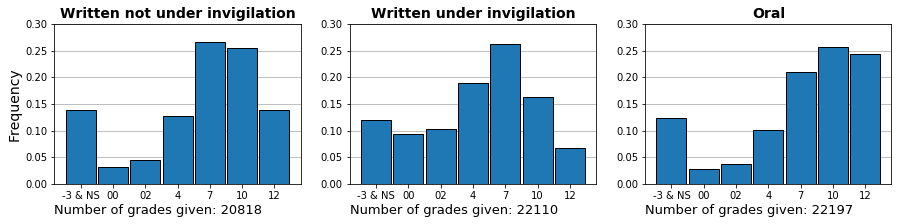

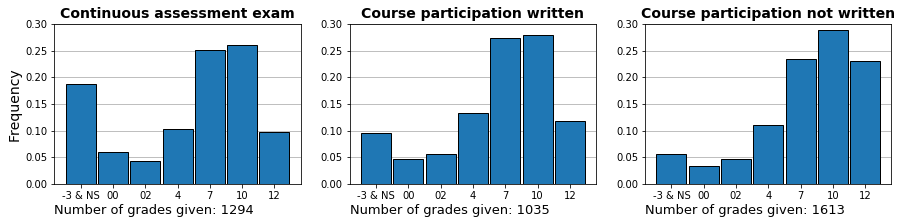

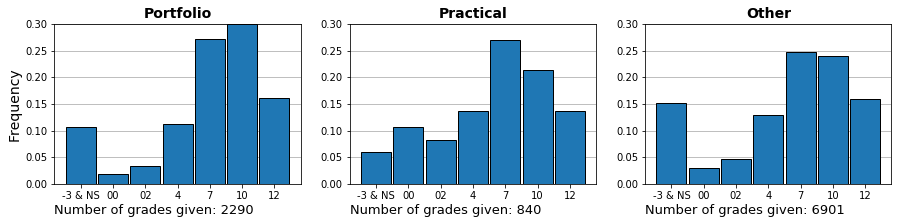

In [6]:
#Calculate plots
x = ["-3 & NS","00","02","4","7","10","12"]
Titles = ["Continuous assessment exam","Written not under invigilation",\
          "Written under invigilation","Course participation written","Course participation not written",\
          "Oral","Other","Portfolio","Practical"]
y = [gpa_frequencies(df,Titles[0]),gpa_frequencies(df,Titles[1]),gpa_frequencies(df,Titles[2]),\
    gpa_frequencies(df,Titles[3]),gpa_frequencies(df,Titles[4]),gpa_frequencies(df,Titles[5]),\
    gpa_frequencies(df,Titles[6]),gpa_frequencies(df,Titles[7]),gpa_frequencies(df,Titles[8])]


f,ax = plt.subplots(figsize=(15,10))

#Written not under invigilation
plt.subplot(3,3,1)
plt.title(Titles[1], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[1], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "20818", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Written under invigilation
plt.subplot(3,3,2)
plt.title(Titles[2], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[2], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "22110", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Oral
plt.subplot(3,3,3)
plt.title(Titles[5], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[5], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "22197", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('type_of_assessment1.png')

f,ax = plt.subplots(figsize=(15,10))

#Continuous assessment exam
plt.subplot(3,3,1)
plt.title(Titles[0], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[0], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "1294", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Course participation written
plt.subplot(3,3,2)
plt.title(Titles[3], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[3], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "1035", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Course participation not written
plt.subplot(3,3,3)
plt.title(Titles[4], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[4], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "1613", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
#plt.savefig('type_of_assessment2.png')

f,ax = plt.subplots(figsize=(15,10))
#Portfolio
plt.subplot(3,3,1)
plt.title(Titles[7], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[7], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "2290", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Portfolio
plt.subplot(3,3,2)
plt.title(Titles[8], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[8], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "840", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Other
plt.subplot(3,3,3)
plt.title(Titles[6], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[6], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "6901", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('type_of_assessment3.png')

In [21]:
#Selfexplaining
print("Written not under invigilation: ",len(gpa_frequencies(df,"Written not under invigilation")[7]))
print("Written under invigilation: ",len(gpa_frequencies(df,"Written under invigilation")[7]))
print("Oral: ",len(gpa_frequencies(df,"Oral")[7]))

print("Continuous assessment exam: ",len(gpa_frequencies(df,"Continuous assessment exam")[7]))
print("Course participation written: ",len(gpa_frequencies(df,"Course participation written")[7]))
print("Course participation not written: ",len(gpa_frequencies(df,"Course participation not written")[7]))

print("Portfolio: ",len(gpa_frequencies(df,"Portfolio")[7]))
print("Practical: ",len(gpa_frequencies(df,"Practical")[7]))
print("Other: ",len(gpa_frequencies(df,"Other")[7]))



Written not under invigilation:  20818
Written under invigilation:  22110
Oral:  22197
Continuous assessment exam:  1294
Course participation written:  1035
Course participation not written:  1613
Portfolio:  2290
Practical:  840
Other:  6901


In [4]:
# Here I calculate the GPA of some form of assessment
def gpa(df,string):
    
    x_gpa = []
    x_sho = []
    x_ect = []

    for i in range(0,len(df)):
        if df["Type of assessmet_edit"][i] == string:
            if math.isnan(df["Snit"][i]) == False:
                x_gpa.append(float(df["Snit"][i]))
                x_sho.append(float(df["Fremmødte"][i]))
                x_ect.append(float(df["Credit_edit"][i]))

    den = 0
    num = 0
    for i in range(0,len(x_gpa)):
        den = x_sho[i]*x_ect[i] + den
        num = x_gpa[i]*x_sho[i]*x_ect[i] + num
    out = num/den
    return out
#Here I return another variable because I tried to perform statistical tests
#This code was not used
def gpa_test(df,string):
    
    x_gpa = []
    x_sho = []
    x_ect = []

    for i in range(0,len(df)):
        if df["Type of assessmet_edit"][i] == string:
            if math.isnan(df["Snit"][i]) == False:
                x_gpa.append(float(df["Snit"][i]))
                x_sho.append(float(df["Fremmødte"][i]))
                x_ect.append(float(df["Credit_edit"][i]))

    den = 0
    num = 0
    for i in range(0,len(x_gpa)):
        den = x_sho[i]*x_ect[i] + den
        num = x_gpa[i]*x_sho[i]*x_ect[i] + num
    out = num/den
    return out,x_gpa

In [5]:
# Here I calculate the GPA of some form of assessment

def gpa_frequencies(df,string):
   
    #Returns a frequencies list in the order (#12,#10,#7,#4,#02,#00,#-3)
    x_12 = []
    x_10 = []
    x_07 = []
    x_04 = []
    x_02 = []
    x_00 = []
    x_m3ef = []
    #x_total = []

    for i in range(0,len(df)):
        if df["Type of assessmet_edit"][i] == string:
            ects = df["Credit_edit"][i]
            x_12.append(df[12][i]*ects)
            x_10.append(df[10][i]*ects)
            x_07.append(df[7][i]*ects)
            x_04.append(df[4][i]*ects)
            x_02.append(df[2][i]*ects)
            x_00.append(df[0][i]*ects)
            x_m3ef.append(df[-3][i]*ects)
            x_m3ef.append(df["Ej mødt"][i]*ects)
            
            #x_total.append(df[12][i])
            #x_total.append(df[10][i])
            #x_total.append(df[7][i])
            #x_total.append(df[4][i])
            #x_total.append(df[2][i])
            #x_total.append(df[-3][i])
            #x_total.append(df["Ej mødt"][i])

    x_12 = [x for x in x_12 if (math.isnan(x) == False)]
    x_10 = [x for x in x_10 if (math.isnan(x) == False)]
    x_07 = [x for x in x_07 if (math.isnan(x) == False)]
    x_04 = [x for x in x_04 if (math.isnan(x) == False)]
    x_02 = [x for x in x_02 if (math.isnan(x) == False)]
    x_00 = [x for x in x_00 if (math.isnan(x) == False)]
    x_m3ef = [x for x in x_m3ef if (math.isnan(x) == False)]
    #x_total = [x for x in x_total if (math.isnan(x) == False)]

    total = sum(x_12)+sum(x_10)+sum(x_07)+sum(x_04)+sum(x_02)+sum(x_00)+sum(x_m3ef)
    fre_12 = sum(x_12)/total
    fre_10 = sum(x_10)/total
    fre_07 = sum(x_07)/total
    fre_04 = sum(x_04)/total
    fre_02 = sum(x_02)/total
    fre_00 = sum(x_00)/total
    fre_m3ef = sum(x_m3ef)/total
    
    return fre_m3ef,fre_00,fre_02,fre_04,fre_07,fre_10,fre_12#,x_total

